# 2D Histograms in Giovanni
***

### This feature would allow users to plot 2-D histograms to compliment the scatter function in Giovanni. 

### The following example shows how using a 2D Histogram can reveal hidden patterns or relationships between wintertime (DJF) FLDAS Model Latent and Sensible Heat Flux in ways that cannot be done with a scatterplot. 

### Across the U.S. during the relationship between summertime Latent Heat Flux and Sensible Heat Flux is inverse where the incoming solar radiation to the ground is partitioned to heating the air near the surface (sensible heat) or to evaporation (latent heat). However, during the winter months, with seasonal snowpack, no leaves on the trees and much more variable weather patterns the relationship is not as clear. And that is what we will investigate in this notebook. 
***

### This notebook was written in Python 3.12.9 and requires the following python packages and their dependencies installed. 

__Required:__
- numpy
- xarray
- matplotlib

#### GES DISC Data Used in Example 

The data used in this notebook can be downloaded from [NASA's Giovanni](https://giovanni.gsfc.nasa.gov/giovanni/).

This example uses FLDAS Model data from [Winter 2025](https://giovanni.gsfc.nasa.gov/giovanni/#service=StSc&starttime=2024-12-01T00:00:00Z&endtime=2025-02-28T23:59:59Z&bbox=-127.9687,25.1697,-66.9727,50.8337&data=FLDAS_NOAH01_C_GL_M_001_Qh_tavg%2CFLDAS_NOAH01_C_GL_M_001_Qle_tavg) and [Summer 2024](https://giovanni.gsfc.nasa.gov/giovanni/#service=StSc&starttime=2024-06-01T00:00:00Z&endtime=2024-08-31T23:59:59Z&bbox=-127.9687,25.1697,-66.9727,50.8337&data=FLDAS_NOAH01_C_GL_M_001_Qh_tavg%2CFLDAS_NOAH01_C_GL_M_001_Qle_tavg) across the CONUS region.

##### Importing Libraries

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

3.12.9 | packaged by conda-forge | (main, Mar  4 2025, 22:37:18) [MSC v.1943 64 bit (AMD64)]


##### Opening Data from Giovanni into Xarray

In [4]:
# Summer Latent and Sensible Heat Fluxes
ds_summer = xr.open_dataset("C:/Users/bomitch1/Downloads/Giovanni_Stats_Examples/g4.scatter.FLDAS_NOAH01_C_GL_M_001_Qh_tavg+FLDAS_NOAH01_C_GL_M_001_Qle_tavg.20240601-20240831.127W_25N_66W_50N.nc")

s_shflx = ds_summer['x_FLDAS_NOAH01_C_GL_M_001_Qh_tavg']

s_lhflx = ds_summer['y_FLDAS_NOAH01_C_GL_M_001_Qle_tavg']

# Winter Latent and Sensible Heat Fluxes
ds_winter = xr.open_dataset('C:/Users/bomitch1/Downloads/Giovanni_Stats_Examples/g4.scatter.FLDAS_NOAH01_C_GL_M_001_Qh_tavg+FLDAS_NOAH01_C_GL_M_001_Qle_tavg.20241201-20250228.127W_25N_66W_50N.nc')

w_shflx = ds_winter['x_FLDAS_NOAH01_C_GL_M_001_Qh_tavg']

w_lhflx = ds_winter['y_FLDAS_NOAH01_C_GL_M_001_Qle_tavg']
w_shflx

<xarray.DataArray 'x_FLDAS_NOAH01_C_GL_M_001_Qh_tavg' (time: 3, lat: 256,
                                                       lon: 610)> Size: 2MB
[468480 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 2kB 25.25 25.35 25.45 25.55 ... 50.55 50.65 50.75
  * lon      (lon) float64 5kB -127.9 -127.8 -127.7 ... -67.25 -67.15 -67.05
  * time     (time) datetime64[ns] 24B 2024-12-01 2025-01-01 2025-02-01
Attributes:
    cell_methods:          time:mean time: mean
    long_name:             Sensible heat flux
    product_short_name:    FLDAS_NOAH01_C_GL_M
    product_version:       001
    quantity_type:         Sensible Heat Flux
    standard_name:         surface_upward_sensible_heat_flux
    units:                 W m-2
    vmax:                  1000000000000000.0
    vmin:                  -1000000000000000.0
    plot_hint_axis_title:  Sensible heat flux monthly 0.1 deg. [FLDAS Model F...

##### We have 3 months of data so the time dimension for each variable should be 3. 

##### Let's Plot a map to double-check we are in the Continential US (CONUS) region.

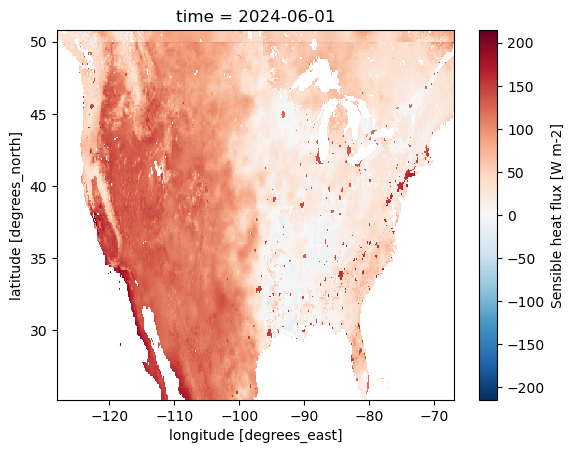

In [3]:
s_shflx[0].plot() #June 2024 Sensible Heat Flux

##### Now the as we stated the summertime relationship between sensible and latent heat flux simple. When we plot the scatterplot, python will take all the points from our 3D array (time, lat, lon) and flatten them, then we have x (sensible heat) and y (latent heat) values to compare to plot. 

Text(0.5, 1.0, 'FLDAS Summer SH Flux vs. LH Flux')

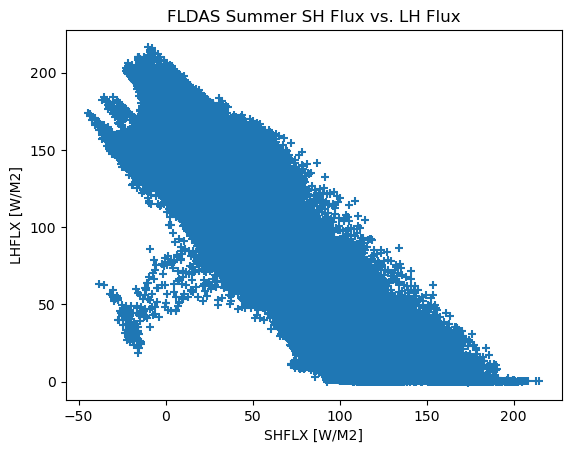

In [4]:
# Scatter Plot
plt.scatter(s_shflx.values,s_lhflx.values,marker='+')
plt.xlabel('SHFLX [W/M2]')
plt.ylabel('LHFLX [W/M2]')
plt.title('FLDAS Summer SH Flux vs. LH Flux')

##### As we can see, that is pretty clear cut with the exception of a few outliers that latent heat flux and sensible heat flux are inversely related during the summer months. 

##### A 2-D historgram will not reveal much more about the scatterplot or relationship between the two variables, but let's plot one anyways to see the potential application and uses. 

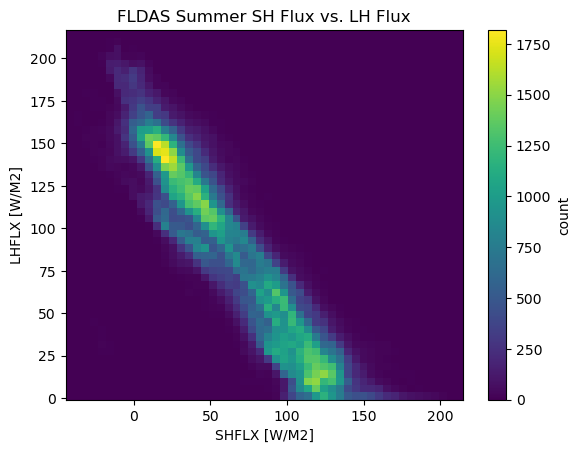

In [5]:
# Python's hist2d function does not like missing values, so we can create a mask that mask out all the bad indices
bad_indices = np.isnan(s_shflx.values.flatten()) | np.isnan(s_lhflx.values.flatten())
good_indices = ~bad_indices

plt.hist2d(s_shflx.values.flatten()[good_indices],s_lhflx.values.flatten()[good_indices],50)
plt.xlabel('SHFLX [W/M2]')
plt.ylabel('LHFLX [W/M2]')
plt.title('FLDAS Summer SH Flux vs. LH Flux')
plt.colorbar(label='count')

##### With the 2D Histogram we can see a the relationship clearer instead of the blue cluster of points from the scatterplot. 

The 2D histogram will provide users who want to analyze the relationship between two variables with the ability to sample many more data points, leading to more robust conclusions and findings for their scholarly needs.

##### Now the summer was quite easy to depict the relationship between sensible and latent heat flux, but what about winter? 

##### Below we plot the winter scatterplot and 2D histogram side-by-side to show the differences between using a 2D histogram and scatterplot to represent the data. 

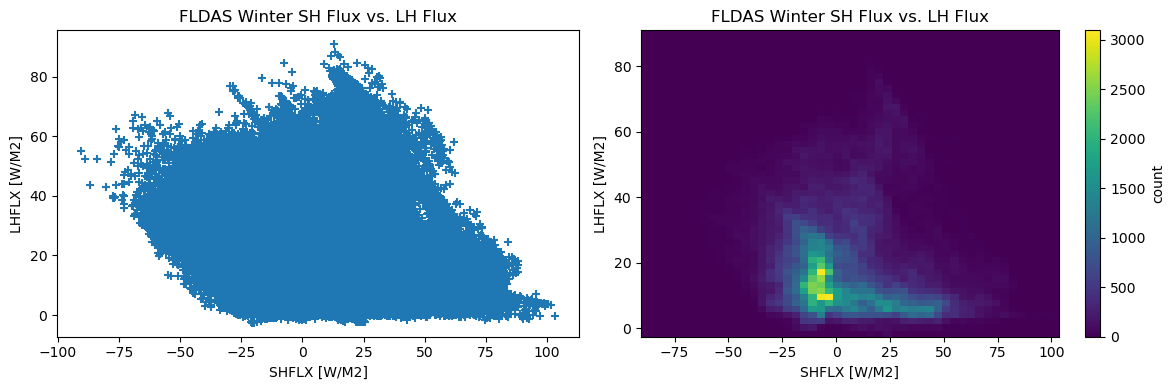

In [6]:
plt.subplots(1,2,figsize=(12,4))

# Scatter Plot
plt.subplot(121)
plt.scatter(w_shflx.values,w_lhflx.values,marker='+')
plt.xlabel('SHFLX [W/M2]')
plt.ylabel('LHFLX [W/M2]')
plt.title('FLDAS Winter SH Flux vs. LH Flux')


# 2-D Histogram
plt.subplot(122)

#Masking
bad_indices_w = np.isnan(w_shflx.values.flatten()) | np.isnan(w_lhflx.values.flatten())
good_indices_w = ~bad_indices_w

plt.hist2d(w_shflx.values.flatten()[good_indices_w],w_lhflx.values.flatten()[good_indices_w],50)
plt.xlabel('SHFLX [W/M2]')
plt.ylabel('LHFLX [W/M2]')
plt.title('FLDAS Winter SH Flux vs. LH Flux')
plt.colorbar(label='count')

plt.tight_layout()

##### From the figure on the left it is hard to discern any relationship from the points plotted. Using the 2-D Histogram we can see the count (or density) of the points on the plot with bright colors representing higher amounts (or clustering) of observations. 

##### There here seems to be multiple regimes (or relationships) for the sensible and latent heat fluxes. The takeaway point is that for some purposes a scatter plot is appropriate for investigating the relationship between two variables, but in some cases a 2D histogram reveals the underlying relationships you otherwise would not be able to see. 